In [23]:
import numpy as np
from matplotlib import pyplot as plt
import math
from numpy.linalg import inv
from numpy.linalg import matrix_power as mpow



# a)

\begin{equation}
i\hbar \partial_t\psi(x,t)=\left(-\frac{\hbar^2}{2m} \vec{\nabla}^2+\frac{1}{2}m\omega^2x^2 \right)\psi(x,t)=\hat{H}\psi(x,t) \tag{1}
\end{equation}

take out $\frac{\omega \hbar}{2}$ from right hand side:

\begin{equation}
i\hbar \partial_t\psi(x,t)=\frac{\omega \hbar}{2}\left(-\frac{\hbar}{m\omega} \vec{\nabla}^2+\frac{m\omega}{\hbar}x^2 \right)\psi(x,t)=\hat{H}\psi(x,t)  \tag{2}
\end{equation}

We devide above equation by $\hbar$. Then, introducing  $\alpha^2=\frac{m \omega}{\hbar}$, we get

\begin{equation}
i\partial_t\psi(x,t)=\frac{\omega}{2}\left(-\frac{1}{\alpha^2} \frac{\partial^2}{\partial x^2} +\alpha^2x^2 \right)\psi(x,t)=\frac{1}{\hbar}\hat{H}\psi(x,t)  \tag{3}
\end{equation}

Multipling  with   $2/\omega$ and introducing new variables $\xi=\alpha x$, $\tau=\frac{\omega t}{2}$ we get:

\begin{equation}
i\partial_\tau\psi=\left(- \frac{\partial^2}{\partial \xi^2} +\xi^2 \right)\psi=\frac{2}{\hbar\omega} \hat{H}\psi=\hat{\tilde{H}}\psi   \tag{4}
\end{equation}
where $\hat{\tilde{H}}=\frac{2}{\hbar\omega} \hat{H}$. Hence $\beta=\frac{2}{\hbar\omega}$.



# b)

In [24]:
ksi_l=-10
ksi_r=10
dksi=0.1    # correspond to delta x
N=int((ksi_r-ksi_l)/dksi)+1    # this is size in Fabians method
dtau=0.005   #correspond to delta t
xi = np.linspace(ksi_l, ksi_r, N)  # range is from -10 to 10 with 0.1 step. 10 is alos included This is Eps in Fabians method
I = np.eye(N,dtype=complex)


In [25]:
def Hamilton(N_steps):
    delta_n_m = np.eye(N_steps)
    delta_n_mp1 = np.eye(N_steps, k=-1)  # delta_{n,m+1}
    delta_n_mm1 = np.eye(N_steps, k=1)  # delta_{n,m-1}
    for n in range(N_steps):
        H=xi[n]**2*delta_n_m[n][n]
    H=-1/dksi**2*(delta_n_mm1+delta_n_mp1-2.0*delta_n_m)+H
    return H


In [26]:
Mat_min=I-1j*Hamilton(N)*dtau/2
Mat_pul=I+1j*Hamilton(N)*dtau/2

S_H=np.linalg.inv(Mat_pul)@Mat_min

print(S_H)

[[ 0.57101109-7.15161495e-01j  0.27432409+2.49232405e-01j
  -0.03248542+7.99297187e-02j ... -0.00919412+1.75376342e-03j
  -0.00931862+2.14012867e-03j -0.00793472+3.40073594e-03j]
 [ 0.27432409+2.49232405e-01j  0.5450765 -6.39893120e-01j
   0.25575515+2.49613760e-01j ... -0.01036607+9.66601724e-05j
  -0.01057801+4.93156150e-04j -0.00931862+2.14012867e-03j]
 [-0.03248542+7.99297187e-02j  0.25575515+2.49613760e-01j
   0.54345787-6.43910149e-01j ... -0.01014428-2.83488065e-04j
  -0.01036607+9.66601724e-05j -0.00919412+1.75376342e-03j]
 ...
 [-0.00919412+1.75376342e-03j -0.01036607+9.66601724e-05j
  -0.01014428-2.83488065e-04j ...  0.54345787-6.43910149e-01j
   0.25575515+2.49613760e-01j -0.03248542+7.99297187e-02j]
 [-0.00931862+2.14012867e-03j -0.01057801+4.93156150e-04j
  -0.01036607+9.66601724e-05j ...  0.25575515+2.49613760e-01j
   0.5450765 -6.39893120e-01j  0.27432409+2.49232405e-01j]
 [-0.00793472+3.40073594e-03j -0.00931862+2.14012867e-03j
  -0.00919412+1.75376342e-03j ... -0.03248

In [27]:
norm_psi=[]
t_steps=[]
def wave_func(N_t,psi_0):
    psi_new=np.copy(psi_0)
    for n in range(N_t):
        psi_new=np.dot(S_H,psi_new)
        norm_each=np.sum(np.abs(psi_new)**2)*dksi
        norm_psi.append(norm_each)
        t_steps.append(n)
        print("Check if psi is normalized in each step=",norm_each)
    return psi_new


# c)

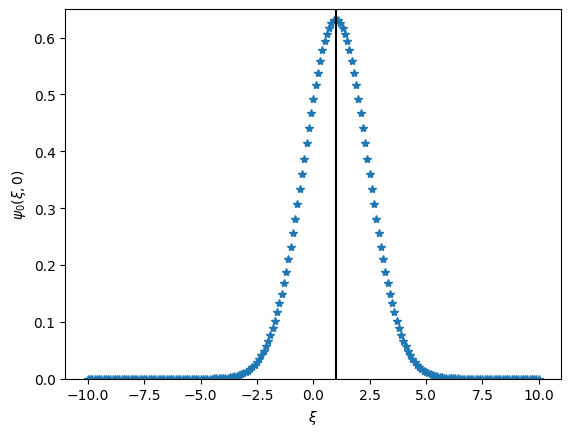

In [28]:
psi0=(1/2/np.pi)**0.25*np.exp(-(xi-1)**2/4)
plt.plot(xi,psi0,'*')
plt.axvline(x = 1, color = 'black', label = 'axvline - full height')
plt.ylabel(r'$\psi_0 (\xi,0)$')
plt.xlabel(r'$\xi$')
plt.ylim(0,0.65)
plt.show()


Discretization is done from -10 to 10 with 0.1 steps with 201 steps
$\xi_j=j\Delta \xi$


In [29]:
norm=np.sum(np.abs(psi0)**2)*dksi
print("Norm of wave function=",norm)

Norm of wave function= 0.9999999999999997


# d)

In [30]:

tau=10
psi_new=wave_func(tau,psi0)
norm_each=np.sum(np.abs(psi_new)**2)*dksi


Check if psi is normalized in each step= 1.0000000000000022
Check if psi is normalized in each step= 0.9999999999999984
Check if psi is normalized in each step= 1.000000000000002
Check if psi is normalized in each step= 0.9999999999999976
Check if psi is normalized in each step= 1.0000000000000018
Check if psi is normalized in each step= 0.9999999999999967
Check if psi is normalized in each step= 1.000000000000001
Check if psi is normalized in each step= 0.9999999999999963
Check if psi is normalized in each step= 1.0000000000000004
Check if psi is normalized in each step= 0.9999999999999947


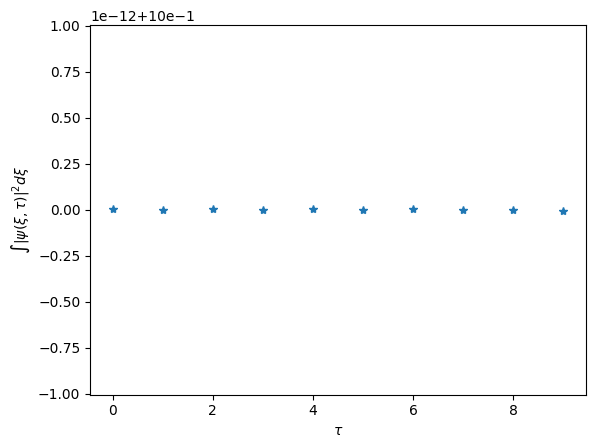

In [31]:
plt.plot(t_steps,norm_psi,'*')
plt.ylabel(r'$\int |\psi (\xi,\tau)|^2d\xi$')
plt.xlabel(r'$\tau $')
plt.show()

In [32]:
Pit = np.linspace(0, 10, 9)  # Points in time
Iit = Pit / dtau  # Indices in time
Iit = Iit.astype(int)  # Indices in time as integers

steps = np.diff(Iit)
phis = [psi0]
for i in range(len(steps)):
    #phis.append(S_H @ phis[-1])
    phis.append(mpow(S_H, steps[i]) @ phis[-1])

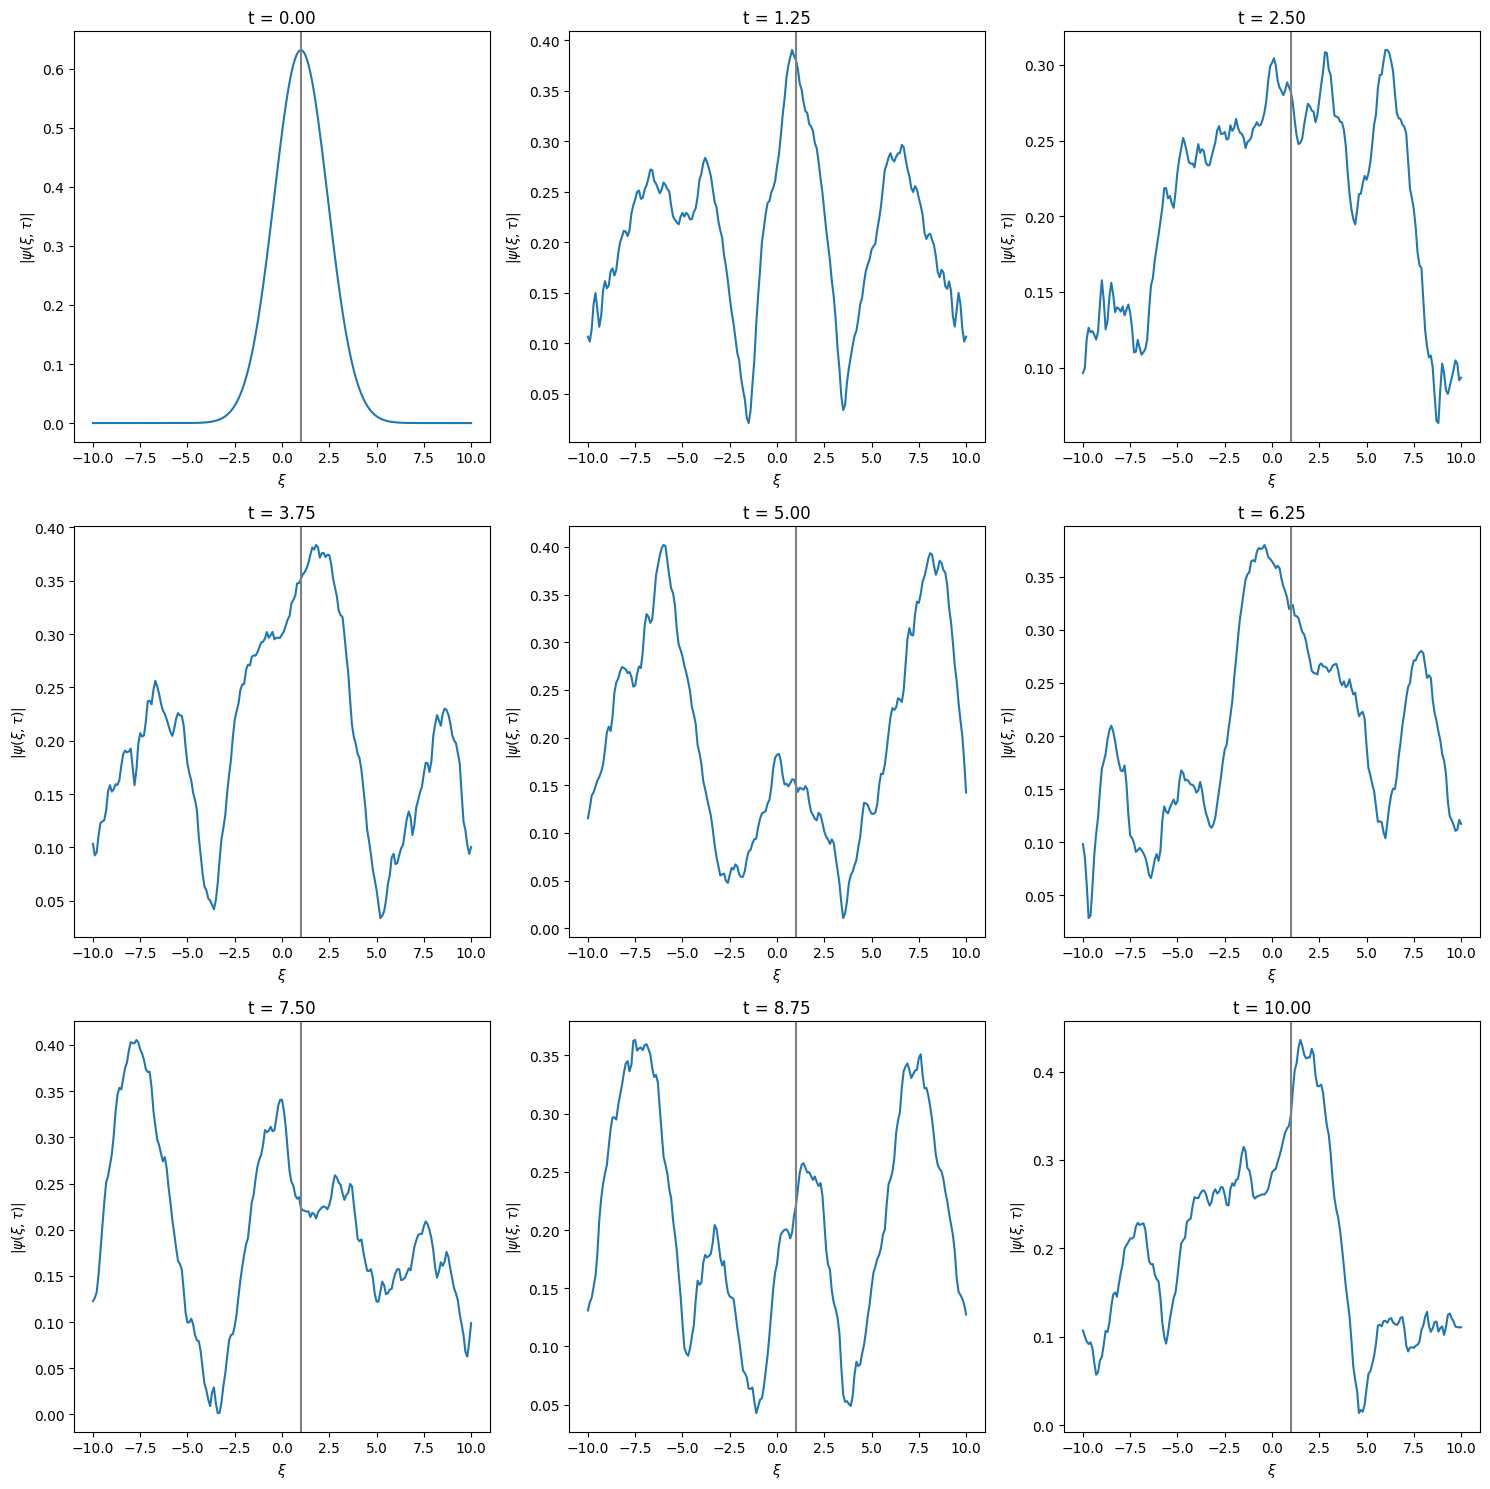

In [33]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, phi in enumerate(phis):
    row = i // 3
    col = i % 3
    ax[row, col].plot(xi, np.abs(phi))
    ax[row, col].set_title(f"t = {Pit[i]:.2f}")
    ax[row, col].set_xlabel(r"$\xi$")
    ax[row, col].axvline(x = 1, color = 'gray', label = 'axvline - full height')
    ax[row, col].set_ylabel(r"$|\psi(\xi,\tau)|$")

fig.tight_layout()